In [4]:
# Data import
import pandas as pd

df=pd.read_csv("BankChurners.csv",skipinitialspace=True)

df.drop(["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],axis=1,inplace=True)

# Select numerical features for clustering
#X = df[["Total_Trans_Ct","Total_Trans_Amt"]]
X = df[["Total_Trans_Ct","Total_Trans_Amt", "Total_Revolving_Bal", "Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1"]]
#X = df[["Total_Trans_Ct","Total_Trans_Amt", "Total_Revolving_Bal", "Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Customer_Age", "Credit_Limit", "Months_on_book"]]

X

,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1
0,42,1144,777,1.335,1.625
1,33,1291,864,1.541,3.714
2,20,1887,0,2.594,2.333
3,20,1171,2517,1.405,2.333
4,28,816,0,2.175,2.500
...,...,...,...,...,...
10122,117,15476,1851,0.703,0.857
10123,69,8764,2186,0.804,0.683
10124,60,10291,0,0.819,0.818
10125,62,8395,0,0.535,0.722


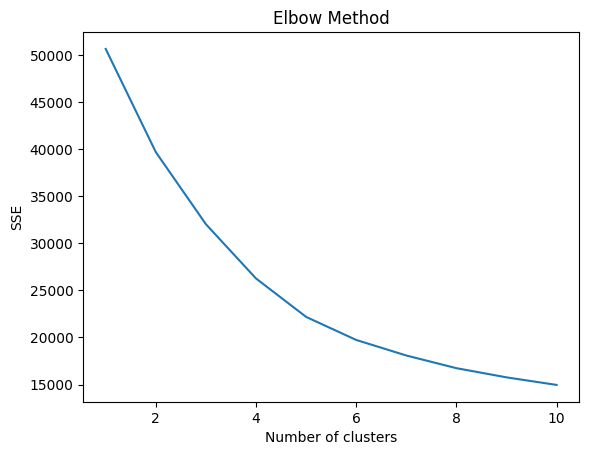

0    5999
2    3285
1     843
Name: KMeans_Cluster, dtype: int64


In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform clustering with K-Means algorithm for different number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)

# Plot SSE for different number of clusters
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Choose optimal number of clusters based on elbow point
k = 3

# Perform clustering with optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_std)

# Add cluster labels to original data
df["KMeans_Cluster"] = kmeans.labels_

# Print number of customers in each cluster
print(df["KMeans_Cluster"].value_counts())

# Save df with cluster back to CSV
df.to_csv("BankChurners_w_Clustering_output_KMeans.csv", index=False)

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform clustering with DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_std)

# Get the number of clusters (excluding noise points)
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

# Print number of customers in each cluster
print("Number of clusters (excluding noise points):", n_clusters_)
print(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts())

# Add cluster labels to original data
df["DBSCAN_Cluster"] = dbscan.labels_

# Save df with cluster back to CSV
df.to_csv("BankChurners_w_Clustering_output_DBSCAN.csv", index=False)

Number of clusters (excluding noise points): 18
0     7924
15     550
12     430
13     142
16      93
17      12
2        8
6        8
1        6
10       6
3        6
9        5
14       5
8        5
7        5
4        4
5        3
11       3
dtype: int64
